In [271]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [295]:
df = pd.read_csv("train.csv")
df_copy = df.copy()
df_selected = df_copy.select_dtypes(include=['float64','int64'])
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

<Axes: xlabel='YrSold', ylabel='SalePrice'>

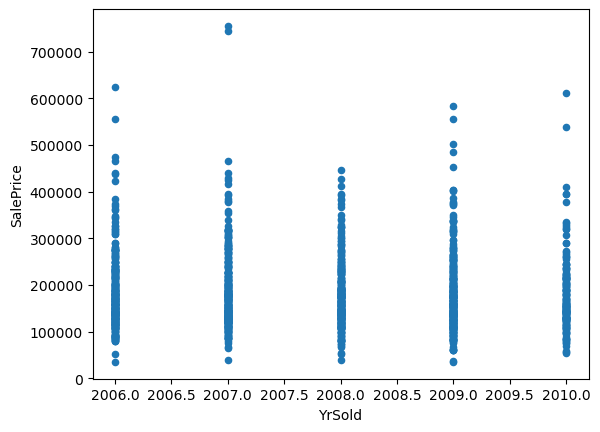

In [296]:
df_copy = df.copy()
df_test = df_copy[["YrSold","SalePrice"]]
df_test.plot(x="YrSold", y="SalePrice", kind="scatter")

In [297]:
df_test.corr()

,YrSold,SalePrice
YrSold,1.000000,-0.028923
SalePrice,-0.028923,1.000000


In [298]:
reg = LinearRegression()
x = df_copy[["GarageArea","TotalBsmtSF","GrLivArea"]]
y = df_copy["SalePrice"].values.reshape(-1,1)
reg.fit(x,y)

LinearRegression()

In [299]:
reg.score(x,y)

0.6621361240143835

In [300]:
test = pd.read_csv("test.csv")
test_copy = test.copy()
test_int_columns = test_copy[["GarageArea","TotalBsmtSF","GrLivArea"]]
test_int_columns = test_int_columns.fillna(test_int_columns["GarageArea"].mean())

In [301]:
sample = pd.read_csv("sample_submission.csv")
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [302]:
final["Id"] = sample["Id"]
final["SalePrice"] = reg.predict(test_int_columns)
final.to_csv("final.csv", index=False)
final

,Id,SalePrice
0,1461,156266.499645
1,1462,164815.481481
2,1463,183297.967443
3,1464,180241.045702
4,1465,179082.884966
...,...,...
1454,2915,77804.145908
1455,2916,107354.050679
1456,2917,179713.164840
1457,2918,87403.860582
